In [2]:
import zipfile
import os

# Path to your zip file
zip_file_path = r'C:\Users\avant\Downloads\archive.zip'

# Create a directory to extract the original audio files
output_dir = 'extracted_original_audio'
os.makedirs(output_dir, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the zip file
    file_list = zip_ref.namelist()
    
    # Extract only the original audio files
    for file_name in file_list:
        # Check if the file is an original audio file
        if 'genres_original' in file_name.lower():
            # Extract the file to the output directory
            zip_ref.extract(file_name, output_dir)
            print(f"Extracted {file_name} to {output_dir}")

print("Extraction complete. Original audio files are extracted to 'extracted_original_audio' directory.")


Extracted Data/genres_original/blues/blues.00000.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00001.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00002.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00003.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00004.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00005.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00006.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00007.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00008.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00009.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00010.wav to extracted_original_audio
Extracted Data/genres_original/blues/blues.00011.wav to extracted_original_audio
Extracted Data/genres_origin

In [4]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

audio_dataset_path= r"C:\Users\avant\extracted_original_audio\Data\genres_original"

metadata=pd.read_csv(r"C:\Users\avant\Downloads\archive\Data\features_30_sec.csv")

metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [22]:
import pandas as pd
from tqdm import tqdm
import os
import librosa
import numpy as np

# Define the function to extract MFCC features
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Path to the directory containing the audio files
audio_dataset_path = r"C:\Users\avant\extracted_original_audio\Data\genres_original"

# Now we iterate through every audio file in the audio_dataset_path and extract MFCC features
extracted_features = []
for class_label in os.listdir(audio_dataset_path):
    class_dir = os.path.join(audio_dataset_path, class_label)
    for file_name in tqdm(os.listdir(class_dir)):
        try:
            full_file_path = os.path.join(class_dir, file_name)
            data = features_extractor(full_file_path)
            extracted_features.append({'feature': data, 'class_label': class_label})
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue




 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:03<00:02, 16.79it/s]

Error processing jazz.00054.wav: module 'soundfile' has no attribute 'SoundFileRuntimeError'


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.41it/s]


In [17]:
import pandas as pd
from tqdm import tqdm
import os
import librosa
import numpy as np

# Define functions to extract individual features
def extract_tempo(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    tempo = librosa.beat.tempo(y=audio, sr=sample_rate)[0]  # Tempo extraction
    return tempo

def extract_spectral_centroid(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sample_rate))  # Spectral Centroid extraction
    return spectral_centroid

def extract_spectral_bandwidth(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate))  # Spectral Bandwidth extraction
    return spectral_bandwidth

def extract_spectral_rolloff(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sample_rate))  # Spectral Rolloff extraction
    return spectral_rolloff

def extract_spectral_contrast(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate))  # Spectral Contrast extraction
    return spectral_contrast

def extract_chromastft(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate))  # Chroma STFT extraction
    return chroma_stft

# Path to the directory containing the audio files
audio_dataset_path = r"C:\Users\avant\extracted_original_audio\Data\genres_original"

# Now we iterate through every audio file in the audio_dataset_path and extract features
extracted_features_extra = []
for class_label in os.listdir(audio_dataset_path):
    class_dir = os.path.join(audio_dataset_path, class_label)
    for file_name in tqdm(os.listdir(class_dir)):
        try:
            full_file_path = os.path.join(class_dir, file_name)
            tempo = extract_tempo(full_file_path)
            centroid = extract_spectral_centroid(full_file_path)
            bandwidth = extract_spectral_bandwidth(full_file_path)
            rolloff = extract_spectral_rolloff(full_file_path)
            contrast = extract_spectral_contrast(full_file_path)
            chroma = extract_chromastft(full_file_path)
            extracted_features_extra.append({'tempo': tempo,
                                       'spectral_centroid': centroid,
                                       'spectral_bandwidth': bandwidth,
                                       'spectral_rolloff': rolloff,
                                       'spectral_contrast': contrast,
                                       'chroma_stft': chroma,
                                       'class_label': class_label})
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(extracted_features_extra)

# Print the DataFrame
print(df)


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\avant\AppData\Local\Temp\ipykernel_51376\1439356910.py:10: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio, sr=sample_rate)[0]  # Tempo extraction
 54%|███████████████████████████████████████████▋                                     | 54/100 [00:49<00:44,  1.03it/s]

Error processing jazz.00054.wav: module 'soundfile' has no attribute 'SoundFileRuntimeError'


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]

          tempo  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0    123.046875        1784.122641         2002.412407       3805.723030   
1    107.666016        1530.261767         2038.987608       3550.713616   
2    161.499023        1552.832481         1747.754087       3042.410115   
3    172.265625        1070.153418         1596.422565       2184.879029   
4    135.999178        1835.128513         1748.410759       3579.957471   
..          ...                ...                 ...               ...   
994  103.359375        2008.174521         2106.314092       4253.623647   
995  117.453835        2006.827265         2068.839259       4149.171791   
996  129.199219        2077.565822         1927.228013       4031.530224   
997  112.347147        1398.649505         1818.165125       3015.597697   
998  123.046875        1609.785181         1797.061553       3246.925584   

     spectral_contrast  chroma_stft class_label  
0            20.523289     0.350129  

In [26]:
X=np.array(extracted_features_df ['feature'].tolist())
print(X.shape)

y=np.array(extracted_features_df['class_label'].tolist())

(999, 40)


In [27]:
import pandas as pd
import numpy as np


# Convert NumPy array X into a DataFrame
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)


# Print the DataFrame
display(df_x)
display(df_y)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-113.598824,121.570671,-19.162262,42.363937,-6.362266,18.621931,-13.699734,15.339802,-12.274305,10.970946,...,5.656073,-3.269008,-0.206064,-2.999698,4.476317,-0.476855,6.006285,-0.059690,-3.458585,-1.841832
1,-207.523834,123.985138,8.947020,35.867149,2.909594,21.519472,-8.556514,23.370676,-10.103608,11.899242,...,0.836019,-3.743217,-4.099705,-2.451906,5.834807,3.544988,4.897320,-0.415597,-1.995415,-0.465218
2,-90.757164,140.440872,-29.084547,31.686691,-13.976547,25.753752,-13.664991,11.634442,-11.778322,9.714756,...,-1.376481,-4.749632,-0.377516,0.493469,0.447271,-4.162672,-4.815749,-6.703234,-4.425334,-0.981519
3,-199.575134,150.086105,5.663404,26.855278,1.770071,14.232647,-4.827845,9.286853,-0.756120,8.134435,...,-2.821949,-4.204427,-2.702336,-3.845604,-2.524410,-4.935610,-5.954977,-6.616996,-6.396001,-1.501189
4,-160.354172,126.209480,-35.581394,22.139256,-32.473549,10.850701,-23.350071,0.493249,-11.796538,1.203519,...,8.481702,3.646146,-3.007674,-6.110803,-6.951970,-4.070553,-1.137216,-0.491605,-4.786619,-3.221128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-153.630051,109.904785,-23.091646,59.014496,-7.520482,19.728550,-16.488035,18.078283,-22.212603,15.408715,...,-1.650898,-6.251560,-3.418129,-2.284464,2.235521,-0.616223,-0.342764,-1.727873,-1.984678,-7.571297
995,-142.416214,116.205460,-32.160263,49.111511,-8.389906,22.885155,-18.317211,20.110556,-22.102661,10.792425,...,0.856813,3.563542,2.528520,-7.160186,-7.583492,-6.473924,-2.109107,-4.180743,-1.862648,-3.137055
996,-124.989655,115.182343,-47.985886,52.820343,-13.493603,21.751259,-12.417659,20.127153,-18.373243,10.123631,...,-1.566430,-4.594644,-2.125535,-0.709826,-0.474563,-3.724411,0.424704,-4.192747,-3.778811,-3.882417
997,-225.033325,123.657265,-9.745124,56.613846,10.421821,20.643209,-10.258778,15.571303,-8.240350,12.808757,...,-1.060652,-1.699285,-0.223900,-1.182510,0.173333,-2.009363,-0.544909,-1.464396,-0.459436,-1.211375


,0
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
994,rock
995,rock
996,rock
997,rock


In [29]:
# Concatenate df_x and df along the columns axis
concatenated_df = pd.concat([df_x, df], axis=1)

# Print the concatenated DataFrame
display(concatenated_df)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,tempo,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,chroma_stft,class_label
0,-113.598824,121.570671,-19.162262,42.363937,-6.362266,18.621931,-13.699734,15.339802,-12.274305,10.970946,...,-0.059690,-3.458585,-1.841832,123.046875,1784.122641,2002.412407,3805.723030,20.523289,0.350129,blues
1,-207.523834,123.985138,8.947020,35.867149,2.909594,21.519472,-8.556514,23.370676,-10.103608,11.899242,...,-0.415597,-1.995415,-0.465218,107.666016,1530.261767,2038.987608,3550.713616,20.672486,0.340849,blues
2,-90.757164,140.440872,-29.084547,31.686691,-13.976547,25.753752,-13.664991,11.634442,-11.778322,9.714756,...,-6.703234,-4.425334,-0.981519,161.499023,1552.832481,1747.754087,3042.410115,22.191292,0.363538,blues
3,-199.575134,150.086105,5.663404,26.855278,1.770071,14.232647,-4.827845,9.286853,-0.756120,8.134435,...,-6.616996,-6.396001,-1.501189,172.265625,1070.153418,1596.422565,2184.879029,21.423621,0.404854,blues
4,-160.354172,126.209480,-35.581394,22.139256,-32.473549,10.850701,-23.350071,0.493249,-11.796538,1.203519,...,-0.491605,-4.786619,-3.221128,135.999178,1835.128513,1748.410759,3579.957471,21.459618,0.308526,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-153.630051,109.904785,-23.091646,59.014496,-7.520482,19.728550,-16.488035,18.078283,-22.212603,15.408715,...,-1.727873,-1.984678,-7.571297,103.359375,2008.174521,2106.314092,4253.623647,22.977342,0.351977,rock
995,-142.416214,116.205460,-32.160263,49.111511,-8.389906,22.885155,-18.317211,20.110556,-22.102661,10.792425,...,-4.180743,-1.862648,-3.137055,117.453835,2006.827265,2068.839259,4149.171791,22.665250,0.398869,rock
996,-124.989655,115.182343,-47.985886,52.820343,-13.493603,21.751259,-12.417659,20.127153,-18.373243,10.123631,...,-4.192747,-3.778811,-3.882417,129.199219,2077.565822,1927.228013,4031.530224,22.309244,0.431980,rock
997,-225.033325,123.657265,-9.745124,56.613846,10.421821,20.643209,-10.258778,15.571303,-8.240350,12.808757,...,-1.464396,-0.459436,-1.211375,112.347147,1398.649505,1818.165125,3015.597697,22.491635,0.362635,rock


In [34]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Split the concatenated DataFrame into features (X) and target (y)
X = concatenated_df.drop(columns=['class_label']).values
y = concatenated_df['class_label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVM classifier
clf.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

       blues       0.59      0.81      0.68        21
   classical       0.92      0.92      0.92        12
     country       0.48      0.54      0.51        24
       disco       0.59      0.59      0.59        22
      hiphop       0.60      0.60      0.60        15
        jazz       0.81      0.78      0.79        27
       metal       0.76      0.89      0.82        18
         pop       0.78      0.74      0.76        19
      reggae       0.60      0.41      0.49        22
        rock       0.33      0.25      0.29        20

    accuracy                           0.64       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.64      0.64      0.63       200

Confusion Matrix:
[[17  0  1  0  0  1  0  0  1  1]
 [ 0 11  0  0  0  1  0  0  0  0]
 [ 3  0 13  2  0  3  1  0  0  2]
 [ 0  0  0 13  2  0  0  3  1  3]
 [ 0  0  3  0  9  0  1  0  1  1]
 [ 2  1  2  1  0 21 

In [35]:
# Initialize SVM classifier with RBF kernel
clf = svm.SVC(kernel='rbf')

# Train the SVM classifier
clf.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.685
Classification Report:
              precision    recall  f1-score   support

       blues       0.71      0.71      0.71        21
   classical       0.57      1.00      0.73        12
     country       0.57      0.54      0.55        24
       disco       0.65      0.50      0.56        22
      hiphop       0.71      0.80      0.75        15
        jazz       1.00      0.67      0.80        27
       metal       0.77      0.94      0.85        18
         pop       0.68      0.79      0.73        19
      reggae       0.88      0.68      0.77        22
        rock       0.41      0.45      0.43        20

    accuracy                           0.69       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.71      0.69      0.68       200

Confusion Matrix:
[[15  1  2  0  0  0  0  0  0  3]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 4  1 13  1  0  0  0  1  0  4]
 [ 0  0  2 11  3  0  0  3  1  2]
 [ 0  0  0  0 12  0  1  1  0  1]
 [ 2  5  0  1  0 18

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_scaled, y_train)
gb_pred = gb_clf.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

# K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.67
Gradient Boosting Accuracy: 0.625
K-Nearest Neighbors Accuracy: 0.575


Iteration 1, loss = 2.39416713
Iteration 2, loss = 2.19997733
Iteration 3, loss = 2.04311829
Iteration 4, loss = 1.91070159
Iteration 5, loss = 1.80442383
Iteration 6, loss = 1.71640931
Iteration 7, loss = 1.64630179
Iteration 8, loss = 1.58485694
Iteration 9, loss = 1.53141485
Iteration 10, loss = 1.48355409
Iteration 11, loss = 1.43962183
Iteration 12, loss = 1.39961140
Iteration 13, loss = 1.36272234
Iteration 14, loss = 1.32857545
Iteration 15, loss = 1.29700620
Iteration 16, loss = 1.26760382
Iteration 17, loss = 1.24031774
Iteration 18, loss = 1.21405937
Iteration 19, loss = 1.18825062
Iteration 20, loss = 1.16433668
Iteration 21, loss = 1.14200838
Iteration 22, loss = 1.12018004
Iteration 23, loss = 1.09898939
Iteration 24, loss = 1.07889033
Iteration 25, loss = 1.05977084
Iteration 26, loss = 1.04114782
Iteration 27, loss = 1.02367158
Iteration 28, loss = 1.00622266
Iteration 29, loss = 0.98911046
Iteration 30, loss = 0.97330539
Iteration 31, loss = 0.95706391
Iteration 32, los

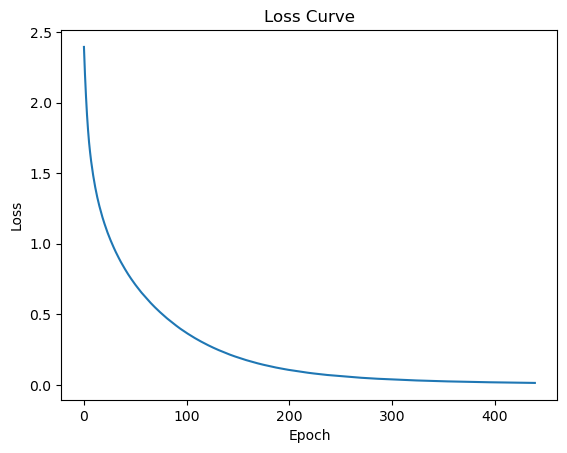

In [38]:
# Initialize MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, verbose=True)

# Train the MLPClassifier
mlp_clf.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = mlp_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Retrieve loss curve
loss_curve = mlp_clf.loss_curve_
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(mlp_clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
